Calcultions of the entanglement spectrum for Laughlin ground states. This code uses a new method which calculates entanglement matrices from superpositions of states and labels them by the momentum offset in the A partition. The resulting entanglement spectrum is compared to that of a single ground state and as shown is pretty different.

In [1]:
from hammer.Diagonalise import LaughlinGroundState
from hammer.FQHTorusBasis import FQHTorusBasis
import numpy as np

Particles = 8
NbrFlux = 3 * Particles
[Basis1, State1] = LaughlinGroundState(Particles, False, np.complex(0.0,2.0))
[Basis2, State2] = Basis1.TranslateState(State1, 1)
[Basis3, State3] = Basis1.TranslateState(State1, 2)

In [2]:
States = [State1, State2, State3]
Bases = [Basis1, Basis2, Basis3]
Coefficients = np.ones(3) / np.sqrt(3)
Matrices = FQHTorusBasis.OrbitalEntanglementMatricesSuperpositionSymmetry(Bases, States, Coefficients, 0, NbrFlux/2)
Norm = FQHTorusBasis.EntanglementNorm(Matrices)
print ("Norm: " + str(Norm))

Norm: 1.0


3.69701802527


(0, 10)

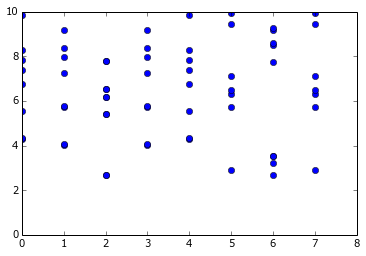

In [8]:
import matplotlib.pyplot as plt

%matplotlib inline

ES = FQHTorusBasis.EntanglementSpectrum(Matrices)
#colors = ['b','r','g','k','m']
EE = FQHTorusBasis.EntanglementEntropy(Matrices)

print EE


for key in ES.keys():
    p = key[0]
    k = key[1]
    vals = ES[key]
    if p == (Particles/2):
        plt.plot(np.ones(len(vals))*key[1], vals, 'bo')

plt.xlim((0,Particles))
plt.ylim((0,10))

    
        
    

In [10]:
Matrices2 = Basis1.OrbitalEntanglementMatrices(State1, 0, NbrFlux/2)

1.54012969563


(0, 10)

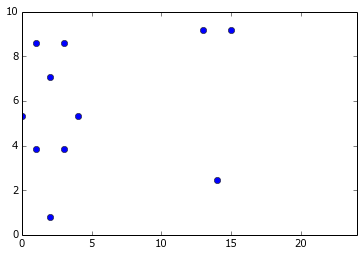

In [11]:
import matplotlib.pyplot as plt

%matplotlib inline

ES2 = FQHTorusBasis.EntanglementSpectrum(Matrices2)
EE2 = FQHTorusBasis.EntanglementEntropy(Matrices2)

print EE2
#colors = ['b','r','g','k','m']

for key in ES2.keys():
    p = key[0]
    k = key[1]
    vals = ES2[key]
    if p == (Particles/2):
        plt.plot(np.ones(len(vals))*key[1], vals, 'bo')

plt.xlim((0,NbrFlux))
plt.ylim((0,10))



In [1]:
from hammer.Diagonalise import CoulombGroundState
from hammer.FQHTorusBasis import FQHTorusBasis
import numpy as np

Particles = 10
NbrFlux = 5 * Particles/2
Momentum = 0
COMMomentum = 0
LL = 1
[BasisReduced1, StateReduced1] = CoulombGroundState(Particles, NbrFlux, LL, Momentum, COMMomentum, False, np.complex(0.0,1.0))
[Basis1, State1] = BasisReduced1.ConvertToFullBasis(StateReduced1)

Bases = list()
States = list()
Bases.append(Basis1)
States.append(State1)

for i in range(1,5):
    [Basis, State] = Basis1.TranslateState(State1, i)
    Bases.append(Basis)
    States.append(State)

In [2]:
Coefficients = np.ones(5) / np.sqrt(5)
Matrices = FQHTorusBasis.OrbitalEntanglementMatricesSuperpositionSymmetry(Bases, States, Coefficients, 0, NbrFlux/2)
Norm = FQHTorusBasis.EntanglementNorm(Matrices)
print ("Norm: " + str(Norm))

Norm: 1.0


In [3]:
Matrices2 = Basis1.OrbitalEntanglementMatrices(State1, 0, NbrFlux/2)
Norm2 = FQHTorusBasis.EntanglementNorm(Matrices2)
print ("Norm2: " + str(Norm2))

Norm2: 1.0


In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

ax = plt.subplot(1,2,1)

ES = FQHTorusBasis.EntanglementSpectrum(Matrices)
#colors = ['b','r','g','k','m']
EE = FQHTorusBasis.EntanglementEntropy(Matrices)

print EE


for key in ES.keys():
    p = key[0]
    k = key[1]
    vals = ES[key]
    if p == (Particles/2):
        ax.plot(np.ones(len(vals))*key[1], vals, 'bo')

ax.set_xlim((0,Particles/2))
ax.set_ylim((0,5))

ax2 = plt.subplot(1,2,2)

ES2 = FQHTorusBasis.EntanglementSpectrum(Matrices2)
#colors = ['b','r','g','k','m']
EE2 = FQHTorusBasis.EntanglementEntropy(Matrices2)

print EE2


for key in ES2.keys():
    p = key[0]
    k = key[1]
    vals = ES2[key]
    if p == (Particles/2):
        ax2.plot(np.ones(len(vals))*key[1], vals, 'bo')

ax2.set_xlim((0,NbrFlux))
ax2.set_ylim((0,5))

    
        
    